### Analisis exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
data = pd.read_csv("movies_dataset.csv")

C:\Users\jere belen\AppData\Local\Temp\ipykernel_16976\133786677.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("movies_dataset.csv")


### Comenzamos viendo la informacion del dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [63]:
data.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [64]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Comenzamos viendo si hay filas repetidas

In [9]:
duplicados = data[data.duplicated()]
duplicados

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
9165,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
9327,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
21165,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,119916,tt0080000,en,The Tempest,"Prospero, the true Duke of Milan is now living...",...,1980-02-27,0.0,123.0,[],Released,NaN,The Tempest,False,0.0,0.0
21854,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,152795,tt1821641,en,The Congress,More than two decades after catapulting to sta...,...,2013-05-16,455815.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Congress,False,6.4,165.0
22151,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",http://www.daysofdarknessthemovie.com/,18440,tt0499456,en,Days of Darkness,When a comet strikes Earth and kicks up a clou...,...,2007-01-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Days of Darkness,False,5.0,5.0
23044,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,25541,tt1327820,da,Broderskab,Former Danish servicemen Lars and Jimmy are th...,...,2009-10-21,0.0,90.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}]",Released,NaN,Brotherhood,False,7.1,21.0
24844,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dealthemovie.com/,11115,tt0446676,en,Deal,As an ex-gambler teaches a hot-shot college ki...,...,2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Deal,False,5.2,22.0


Eliminamos las filas duplicadas

In [10]:
data.drop_duplicates(inplace = True)

Eliminamos las columnas que no vamos a utilizar

In [11]:
columnas_a_eliminar = ["imdb_id","video","original_title","poster_path","homepage","status","id","overview"]
data = data.drop(columnas_a_eliminar,axis = 1)

In [265]:
data.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

### Adult

Vemos si hay algun nulo en adult o si algun valor no corresponde a true o false

In [67]:
data[data["adult"] != "True"][data["adult"] != "False"]

C:\Users\jere belen\AppData\Local\Temp\ipykernel_6500\2565351083.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["adult"] != "True"][data["adult"] != "False"]


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notamos que 3 registros tienen datos incorrectos en la columna pero tambien es el caso de falencias en otras columnas por lo que decidimos eliminarlos 

In [12]:
data = data.drop([19730,29503,35587])

In [69]:
data["adult"].isnull().sum()

0

Contamos cuantas peliculas son para adultos y cuantas no con la intencion de hacer un grafico de torta

In [70]:
data["adult"].value_counts()

adult
False    45441
True         9
Name: count, dtype: int64

Al ver que solo 9 registros de los 45450 decidimos eliminar la columna

In [264]:
data.drop("adult",inplace=True,axis=1)

### Belongs_to_collection

In [72]:
data["belongs_to_collection"]

0        {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                      NaN
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                      NaN
4        {'id': 96871, 'name': 'Father of the Bride Col...
                               ...                        
45461                                                  NaN
45462                                                  NaN
45463                                                  NaN
45464                                                  NaN
45465                                                  NaN
Name: belongs_to_collection, Length: 45450, dtype: object

Notamos que son diccionarios anidados en una columna,ademas vemos que en algunos registros hay datos de numeros,por lo que vamos a crear una nueva columna que solo contenga los nombres de las colecciones y un nan para los sin datos,luego eliminaremos la columna original

In [269]:
def obtener_valor(diccionario):
    try:
     elemento = eval(diccionario)
     valor = elemento["name"]
     return valor
    except:
          return np.NaN

In [74]:
data["collection"] = data["belongs_to_collection"].apply(obtener_valor)

In [75]:
data.drop("belongs_to_collection",inplace =True,axis = 1)

Hacemos un grafico de tortas para mostras la proporcion entre peliculas que no pertenecen a una coleccion y las que si

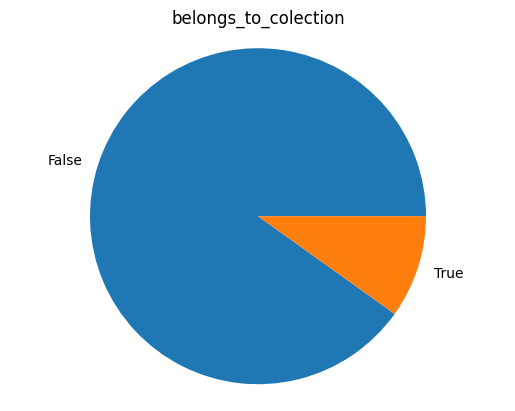

In [120]:
valores = [data["collection"].isna().sum(),data["collection"].count()]
plt.pie(valores, labels =  ["False","True"])
plt.axis("equal")
plt.title("belongs_to_colection")
plt.show()


### Budget

Notamos que el tipo de dato es un string por lo que vamos a castearlo a tipo float,ademas buscamos fallas en la integridad de los datos

In [121]:
type(data.loc[0]["budget"])

str

In [49]:
data["budget"].describe()

count    4.545000e+04
mean     4.225766e+06
std      1.742648e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

Buscamos posibles fallos de integridad en los datos

In [13]:
for i,elemento in enumerate(data["budget"]):
    if elemento.isdigit() == False:
        print(i,elemento)

In [14]:
data["budget"] = data["budget"].astype(float)

Generamos un diagrama de caja para ver posibles outliers.Para esto generamos un nuevo dataframe donde no tomamos en cuenta los valores 0 que nos sesgaria el analisis.

In [15]:
data_budget = data[data["budget"] != 0]

In [16]:
(data["budget"] == 0).value_counts()

True     36561
False     8889
Name: budget, dtype: int64

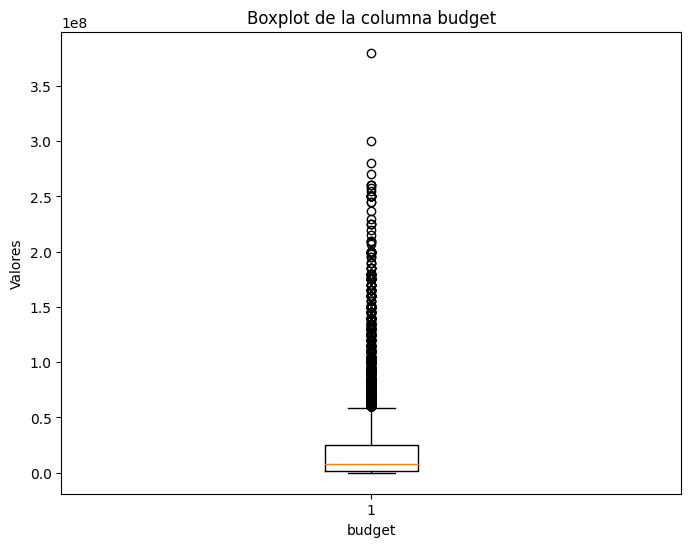

In [18]:
#Le especificamos un tamaño al grafico
plt.figure(figsize=(8, 6))
plt.boxplot(data_budget['budget'])

# Agregamos etiquetas y título
plt.xlabel('budget')
plt.ylabel('Valores')
plt.title('Boxplot de la columna budget')
#plt.ylim(0, 3)

# Mostramos el gráfico
plt.show()

Vemos que la gran cantidad de valores atipicos nos dificulta el analisis por lo que hacemos un histograma de estos valores.

In [134]:
rango_intercuantil = data_budget['budget'].quantile(0.75) - data_budget['budget'].quantile(0.25)
limite_inferior_budget = data_budget['budget'].quantile(0.25)- 1.5*rango_intercuantil
limite_superior_budget =  data_budget['budget'].quantile(0.75) + 1.5 * rango_intercuantil
outliers_budget = data_budget[(data_budget['budget'] < limite_inferior_budget) | (data_budget['budget'] > limite_superior_budget)]
cantidad_outliers = outliers_budget.shape[0]
cantidad_outliers

930

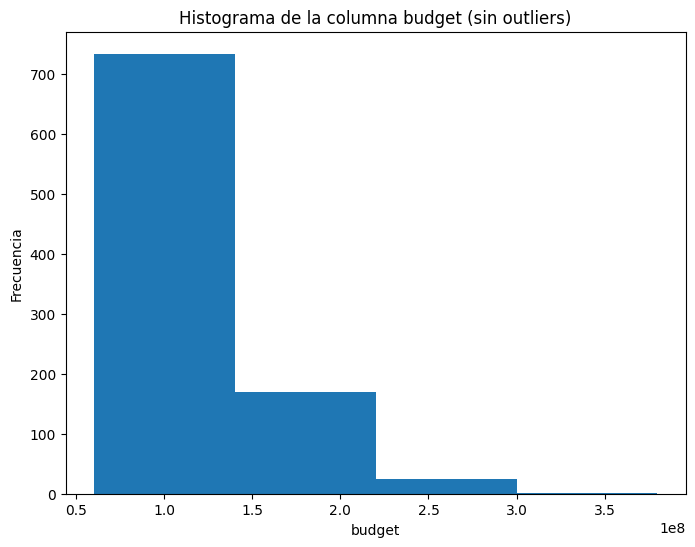

In [135]:
# Crear el histograma con los valores filtrados
plt.figure(figsize=(8, 6))
plt.hist(outliers_budget["budget"], bins= 4)
plt.xlabel('budget')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna budget (sin outliers)')

plt.show()

In [91]:
data[data['budget'] == (data['budget'].max())]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
17124,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",380000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1865,en,Captain Jack Sparrow crosses paths with a woma...,27.88772,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-05-14,1.045714e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,5068.0


La pelicula mas cara del dataset,Piratas del Caribe en aguas misteriosa es efectivamente la mas cara de la historia por lo que aunque no podriamos concluir que todas las peliculas con presupuestos atipicos son valores correctos,si podemos concluir que hay producciones con presupuestos mucho mas elevados que la gran mayoria.En un analisis mas profundo seria interesante saber si ellas pertenecen a la misma productora o si un presupuesto atipico tiene correlacion con una mayor popularidad..

### Genres

Notamos que son una lista de diccionarios,por lo que vamos a desanidar y generar una lista con los generos y luego eliminaremos la original.Ademas los valores nulos son listas vacias

In [92]:
def convertir(lista_diccionarios):
     lista_retornar = []
     try:
          lista = (eval(lista_diccionarios))
          for elemento in lista:
               if elemento["name"] != "":
                    lista_retornar.append(elemento["name"])
               else:
                    continue
          return lista_retornar
     except:
          return lista_retornar

In [147]:
data["genres_lista"] = data["genres"].apply(convertir)

In [8]:
data["genres_lista"]

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres_lista, Length: 45450, dtype: object

In [143]:
data.drop("genres",inplace = True,axis = 1)

Vamos a generar una nube de palabras para esto primero unimos en un string todos los generos y podremos percibir la frecuencia de las mismas de manera grafica.

In [9]:
texto = ''
for row in data['genres_lista']:
    for element in row:
        if isinstance(element, (int, float)):
            continue  # Omitir valores numéricos
        if element:  # Omitir elementos vacíos
            texto += element + ' '

print(texto)

Animation Comedy Family Adventure Fantasy Family Romance Comedy Comedy Drama Romance Comedy Action Crime Drama Thriller Comedy Romance Action Adventure Drama Family Action Adventure Thriller Adventure Action Thriller Comedy Drama Romance Comedy Horror Family Animation Adventure History Drama Action Adventure Drama Crime Drama Romance Crime Comedy Crime Comedy Adventure Action Comedy Crime Comedy Thriller Crime Drama Thriller Action Adventure Crime Thriller Drama Fantasy Science Fiction Thriller Drama Romance Drama Comedy Drama Family Drama Romance Fantasy Science Fiction Adventure Drama Crime Drama Crime Science Fiction Thriller Mystery Romance Adventure Fantasy Drama Comedy Family History Drama Romance Drama Adventure History Drama Family Comedy Family Romance Comedy Drama Romance Drama Drama War Action Crime Drama History Drama Romance Action Fantasy Fantasy Drama Comedy Thriller Drama Romance Crime Mystery Thriller Adventure Animation Drama Family Drama Romance Drama Crime Thriller 

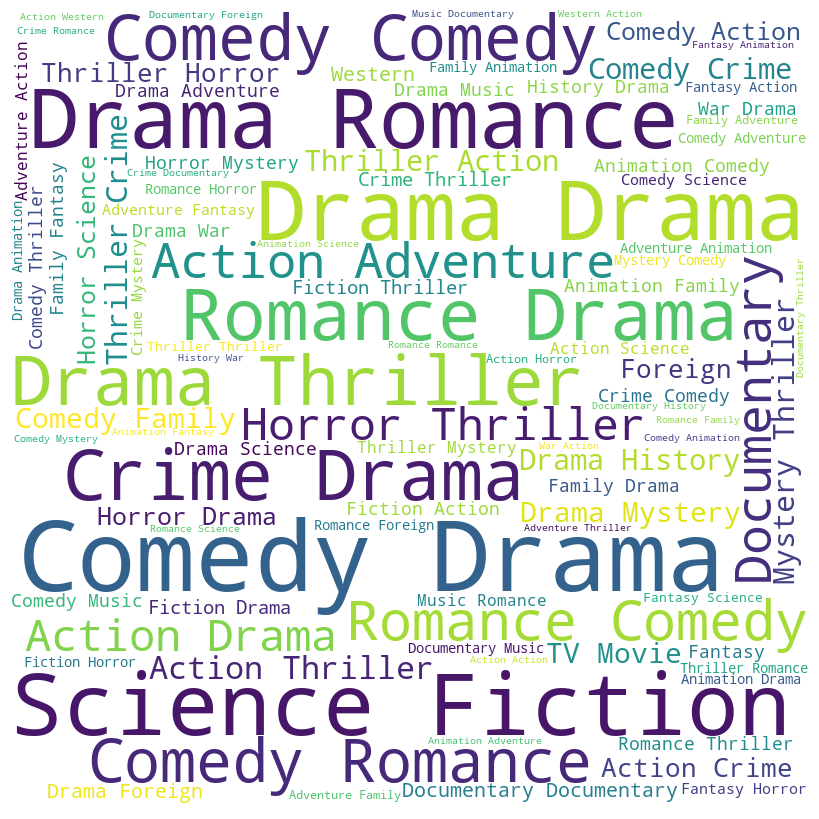

In [10]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(texto)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Original_languages

In [139]:
data["original_language"].isna().sum()

11

In [158]:
data["original_language"].fillna("Sin lenguage",inplace = True)

Vemos que todos los lenguages son un string de 2 aprovechamos esto para recorrer la columna y verificar la calidad de los datos,buscamos que los unicos elementos con len>2 sean los que rellenamos

In [159]:
for i,elemento in enumerate(data["original_language"]):
   if len(elemento) != 2:
        print(i,elemento)
   

19569 Sin lenguage
21595 Sin lenguage
22823 Sin lenguage
32127 Sin lenguage
37392 Sin lenguage
41031 Sin lenguage
41856 Sin lenguage
44041 Sin lenguage
44394 Sin lenguage
44560 Sin lenguage
44639 Sin lenguage


Vemos los 5 lenguages originales con mayor frecuencia

In [181]:
data["original_language"].value_counts().head(8)

en    32262
fr     2437
it     1529
ja     1350
de     1079
es      994
ru      826
hi      508
Name: original_language, dtype: int64

### Spoken_languages

In [161]:
data["spoken_languages"]

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
45461               [{'iso_639_1': 'fa', 'name': 'فارسی'}]
45462                    [{'iso_639_1': 'tl', 'name': ''}]
45463             [{'iso_639_1': 'en', 'name': 'English'}]
45464                                                   []
45465             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45450, dtype: object

In [162]:
data["languages"] = data["spoken_languages"].apply(convertir)

In [170]:
data["languages"].value_counts().head(10)

[English]              22471
[]                      3955
[Français]              1859
[日本語]                   1290
[Italiano]              1220
[Español]                913
[Pусский]                812
[Deutsch]                765
[English, Français]      689
[English, Español]       581
Name: languages, dtype: int64

Ahora que sabemos que gran parte de las peliculas fueron producidas en idioma ingles gracias al analisis exploratorio de originak_language,buscamos si los elementos vacios corresponden al idioma ingles

In [186]:
cuenta = 0
for i,elemento in enumerate(data["languages"]):
    if len(elemento) == 0:
       if data["original_language"][i] == "en":
           cuenta += 1
print(cuenta)
    

2675


Podemos ver que gran partes de las peliculas solo estan en ingles por lo tanto consideramos que la columna no agrega valor y la eliminamos

In [189]:
data.drop(columns=["spoken_languages","languages"],inplace = True)

### Title

In [191]:
data["title"].isnull().sum()

3

In [192]:
for i,elemento in enumerate(data["title"]):
    if type(elemento) == float:
        print(i,elemento)

19724 nan
29489 nan
35572 nan


In [196]:
data[data["title"].isna()]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_average,vote_count


Tenemos 3 registros con valores nulos en el title que al verlos notamos que tienen demasiados datos faltantes por lo que los eliminamos

In [195]:
data.drop([19729,29502,35586],inplace = True)

Vamos a generar nuevamente una nube de palabras para ver rapidamente cuales son las mas frecuentes en los titulos

In [197]:
texto_title = " ".join(data["title"])

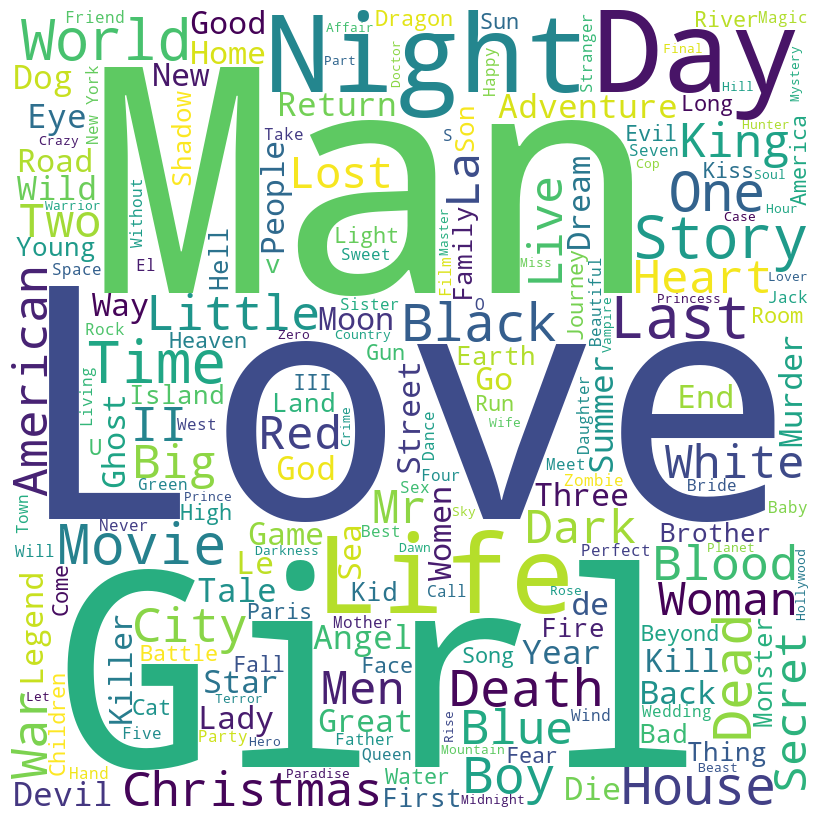

In [198]:
wordcloud_title = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(texto_title)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_title)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Runtime 

In [199]:
data["runtime"].isnull().sum()

0

Tenemos 257 valores nulos 

In [117]:
data[data["runtime"].isnull()]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count


In [118]:
for i,elemento in enumerate(data["runtime"]):
    if type(elemento) != float:
        if elemento.isna() != True:
         print(i,elemento)

Tenemos valores nullos y 0 por lo que vamos a rellenar los nulos con 0,para que haya mayor calidad del dato y nos permita aplicar de manera mas facil un boxplot y ver posibles outliers

In [119]:
data[data["runtime"].isnull()]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count


In [95]:
data["runtime"].fillna(0,inplace=True)

In [120]:
data_runtime = data[data["runtime"] != 0]

Se dificulta el analisis de la caja por la gran cantidad de outliers

In [122]:
(data_runtime[data_runtime["runtime"] != 0]).shape

(43632, 18)

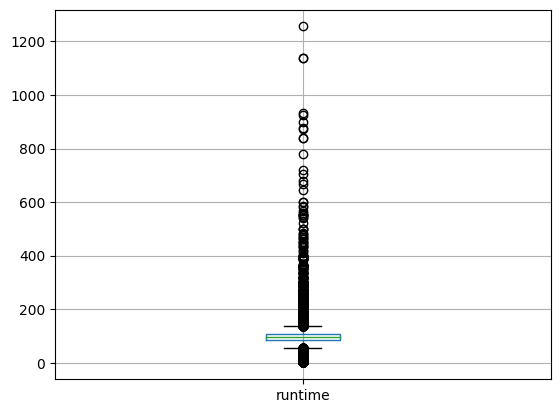

In [123]:
boxplot = data_runtime.boxplot(column=["runtime"])  

In [126]:
rango_intercuantil_runtime = (data_runtime['runtime'].quantile(0.75)) - (data_runtime['runtime'].quantile(0.25))
limite_inferior_runtime = data_runtime['runtime'].quantile(0.25)- 1.5*rango_intercuantil_runtime
limite_superior_runtime =  data_runtime['runtime'].quantile(0.75) + 1.5 * rango_intercuantil_runtime
outliers_time= data_runtime[(data_runtime['runtime'] < limite_inferior_runtime) | (data_runtime['runtime'] > limite_superior_runtime)]
cantidad_outliers_time = outliers_time.shape[0]
cantidad_outliers_time


4236

In [127]:
data_runtime[data_runtime["runtime"]>limite_superior_runtime]

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",A Los Angeles Crime Saga,Heat,7.7,1886.0
13,False,NaN,44000000.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",10858,en,An all-star cast powers this epic look at Amer...,5.092,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]","Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,7.1,72.0
15,False,NaN,52000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",524,en,The life of the gambling paradise – Las Vegas ...,10.137389,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",No one stays at the top forever.,Casino,7.8,1343.0
72,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",48750,fr,"In France during World War II, a poor and illi...",1.479446,"[{'name': 'Les Films 13', 'id': 1742}, {'name'...","[{'iso_3166_1': 'FR', 'name': 'France'}]",1995-03-22,0.0,175.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]","In a time of chaos, in a world of change, he w...",Les Miserables,6.6,8.0
108,False,NaN,72000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",197,en,"Enraged at the slaughter of Murron, his new br...",20.755149,"[{'name': 'Icon Entertainment International', ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-05-24,210000000.0,177.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Every man dies. Not every man truly lives.,Braveheart,7.7,3404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45424,False,NaN,0.0,"[{'id': 12, 'name': 'Adventure'}]",42652,ru,A Russian version of the classic Alexandre Dum...,0.243401,"[{'name': 'Odessa Film Studios', 'id': 13852}]","[{'iso_3166_1': 'UA', 'name': 'Ukraine'}, {'is...",1988-01-01,0.0,270.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",NaN,The Prisoner of If Castle,5.0,3.0
45425,False,NaN,0.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",143117,ru,"The story happens mainly around ""The Old Arbat...",0.630944,"[{'name': 'Mosfilm', 'id': 5120}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1989-02-03,0.0,139.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",NaN,"A Black Rose Is an Emblem of Sorrow, a Red Ros...",6.5,4.0
45429,False,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 878...",36680,en,Are we prepared for dealing with the prospect ...,0.315713,[],"[{'iso_3166_1': 'BE', 'name': 'Belgium'}]",2006-05-01,0.0,156.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Are we prepared for dealing with the prospect ...,TechnoCalyps,5.0,1.0
45453,False,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,hi,The bliss of a biology teacher’s family life i...,1.559596,"[{'name': 'Mad Films', 'id': 82459}, {'name': ...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2017-07-07,0.0,146.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",NaN,Mom,6.6,14.0


Muchos de estos registros outlier son valores correctos ya que corresponden a series y tambien cortos antiguos,aunque no podemos saber con certeza cuantos de los registros corresponden a series,peliculas y cortos es importante que no solo nos encontramos con peliculas dentro del dataset.

### Popularity y vote_average

Tenemos 3 columnas que se orientan a la popularidad de las peliculas,la cantidad de votos el valor promedio que toman y la popularidad asignada.Veremos si hay una correlacion entre el promedio y la popularidad

In [216]:
data["popularity"] = data["popularity"].astype(float)

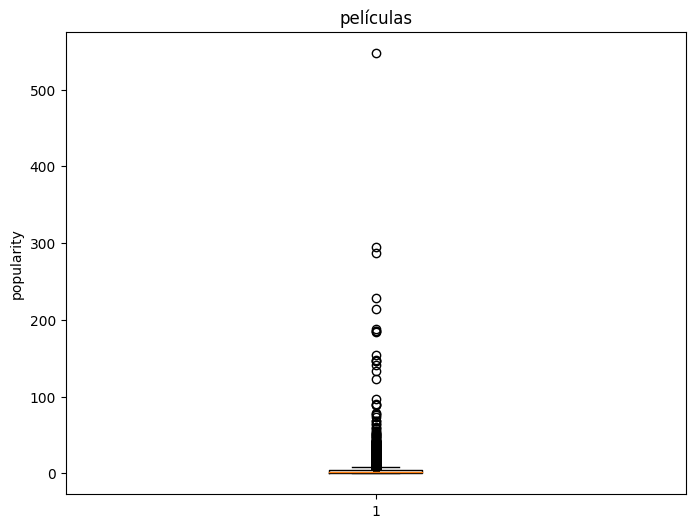

In [218]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['popularity'])
plt.ylabel('popularity')
plt.title('películas')
plt.show()

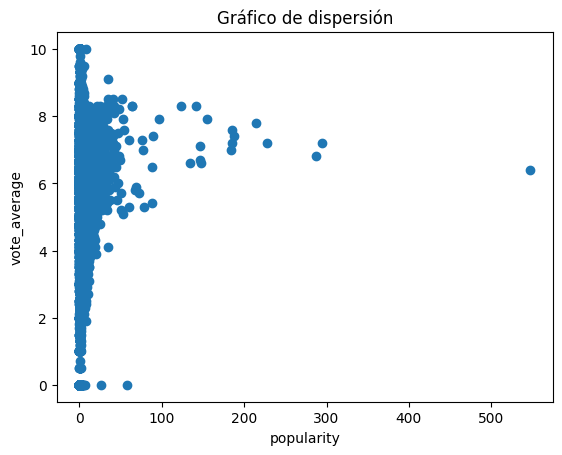

In [242]:
x = data["popularity"]
y = data["vote_average"]

# Crear el gráfico de dispersión
plt.scatter(x, y)

# Agregar etiquetas y título
plt.xlabel("popularity")
plt.ylabel("vote_average")
plt.title("Gráfico de dispersión")

# Mostrar el gráfico
plt.show()

El promedio de votos y su cantidad son valores que podemos verificar en la fuente de datos original no pasa asi con la popularidad ademas notamos que su valores parecen no ser confiables por esto eliminamos la columna

In [247]:
data.drop(columns="popularity",inplace = True)

In [251]:
data_average = data[data["vote_average"] > 0]

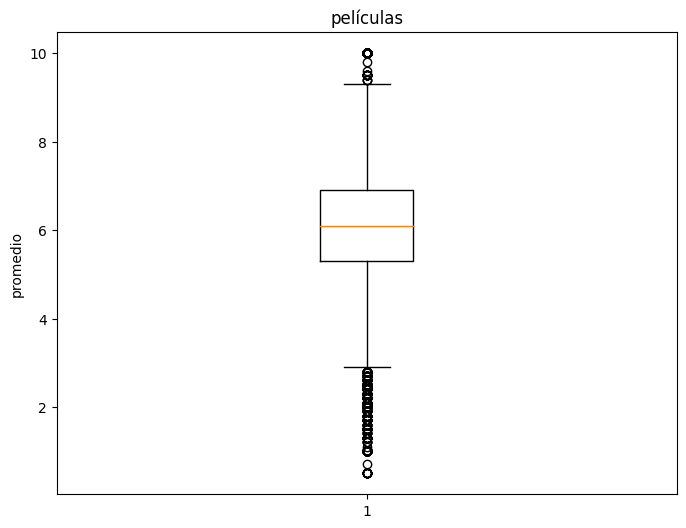

In [252]:
plt.figure(figsize=(8, 6))
plt.boxplot(data_average['vote_average'])
plt.ylabel('promedio')
plt.title('películas')
plt.show()

In [250]:
data[data["vote_average"] == 0]

C:\Users\jere belen\AppData\Local\Temp\ipykernel_16976\3060631774.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["vote_average"] == 0][data["vote_count"]>0]


,adult,belongs_to_collection,budget,genres,id,original_language,overview,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_average,vote_count
554,False,NaN,0.0,[],218473,en,"The Beans are poor, proud, hated by all, but a...",[],[],1994-01-01,0.0,0.0,NaN,"The Beans of Egypt, Maine",0.0,1.0
1371,False,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",303693,en,An emotional and thrilling tale of life and de...,"[{'name': 'Elkins Entertainment', 'id': 3276},...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-08-25,0.0,94.0,NaN,Inside,0.0,1.0
1564,False,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",172545,en,A passionately committed young dancer is force...,"[{'name': 'Greentrees Films', 'id': 3798}, {'n...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1996-11-08,0.0,98.0,Love is the ultimate kick,Alive and Kicking,0.0,1.0
12274,False,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10770, 'n...",111744,en,True story of boxers Joe Louis and Max Schmeli...,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-03-03,0.0,109.0,NaN,Joe and Max,0.0,1.0
13226,False,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",40873,en,"Interviews, archival footage and home movies a...",[],[],2007-09-14,0.0,93.0,NaN,Pete Seeger: The Power of Song,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44535,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",412059,en,"In forgotten towns along the American border, ...",[],"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2018-04-04,0.0,105.0,NaN,Mobile Homes,0.0,1.0
44780,False,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",455963,en,"In 2010 David Crowley, an Iraq veteran, aspiri...",[],[],2017-08-07,0.0,93.0,NaN,A Gray State,0.0,1.0
44873,False,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",432607,en,"Dina, an outspoken and eccentric 49-year-old i...",[],[],2017-10-20,0.0,101.0,NaN,Dina,0.0,2.0
45006,False,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",359749,en,78 shots. 52 cuts. The shower scene from PSYCHO.,"[{'name': 'Exhibit A Pictures', 'id': 63267}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-11-03,0.0,91.0,NaN,78/52,0.0,4.0


Fuimos a la fuente orignal de los datos imbd y logramos notar que muchos de los promedios de votos no son 0 o nulos por lo que tomamos la decision de imputar los valores con la media

In [256]:
media = (data[data["vote_average"] != 0]["vote_average"]).mean()
data["vote_average"].replace(0,media,inplace = True)

### Revenue

In [262]:
data["revenue"]

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45461            0.0
45462            0.0
45463            0.0
45464            0.0
45465            0.0
Name: revenue, Length: 45447, dtype: float64

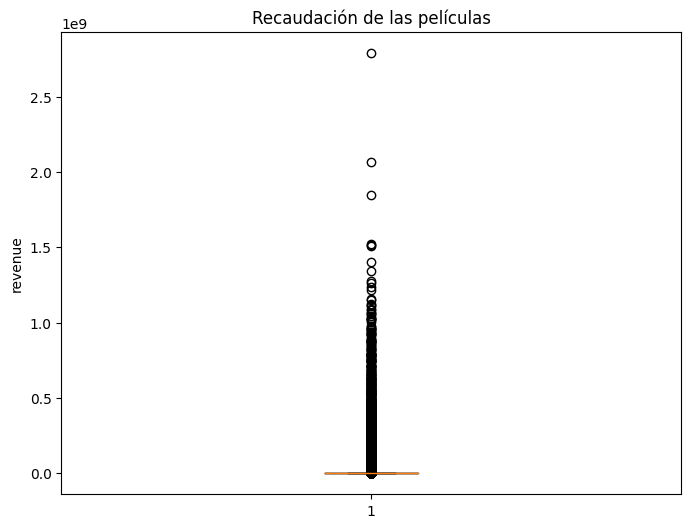

In [258]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['revenue'])
plt.ylabel('revenue')
plt.title('Recaudación de las películas')
plt.show()

In [261]:
data.sort_values("revenue",ascending = False).head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_average,vote_count
14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,en,"In the 22nd century, a paraplegic Marine is di...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162.0,Enter the World of Pandora.,Avatar,7.2,12114.0
26555,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",140607,en,Thirty years after defeating the Galactic Empi...,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2.068224e+09,136.0,Every generation has a story.,Star Wars: The Force Awakens,7.5,7993.0
1639,False,NaN,200000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,en,"84 years later, a 101-year-old woman named Ros...","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,1.845034e+09,194.0,Nothing on Earth could come between them.,Titanic,7.5,7770.0
17818,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",24428,en,When an unexpected enemy emerges and threatens...,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-04-25,1.519558e+09,143.0,Some assembly required.,The Avengers,7.4,12000.0
25084,False,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397,en,Twenty-two years after the events of Jurassic ...,"[{'name': 'Universal Studios', 'id': 13}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-09,1.513529e+09,124.0,The park is open.,Jurassic World,6.5,8842.0


Tiene sentido que estas peliculas hayan ganado mucho mas que otras por ser reconocidos exitos por lo que podemos ver que los valores atipicos no son erroneos.

### Production_companies

In [281]:
data["production_companies"]

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45447, dtype: object

Vemos que son listas de diccionarios por lo que lo desaplanamos

In [272]:
def convertir_a_lista(lista_diccionario):
    lista_retornar = []
    if eval(lista_diccionario):
        lista = (eval(lista_diccionario))
        for elemento in lista:
            try:
                lista_retornar.append(elemento["name"])
            except:
                pass
    return lista_retornar

In [274]:
data["companies"] = data["production_companies"].apply(convertir_a_lista)

Nuevamente generamos una nube de palabras

In [279]:
texto_companies = ''
for row in data['companies']:
    for element in row:
        if element:  # Omitir elementos vacíos
            texto_countries += element + ' '

print(texto_countries)

Pixar Animation Studios TriStar Pictures Teitler Film Interscope Communications Warner Bros. Lancaster Gate Twentieth Century Fox Film Corporation Sandollar Productions Touchstone Pictures Regency Enterprises Forward Pass Warner Bros. Paramount Pictures Scott Rudin Productions Mirage Enterprises Sandollar Productions Constellation Entertainment Worldwide Mont Blanc Entertainment GmbH Walt Disney Pictures Universal Pictures Imperial Entertainment Signature Entertainment United Artists Eon Productions Columbia Pictures Castle Rock Entertainment Columbia Pictures Castle Rock Entertainment Enigma Pictures Universal Pictures Amblin Entertainment Amblimation Hollywood Pictures Cinergi Pictures Entertainment Le Studio Canal+ Laurence Mark Productions Metro-Goldwyn-Mayer (MGM) Carolco Pictures Universal Pictures Légende Entreprises Syalis DA De Fina-Cappa Columbia Pictures Corporation Mirage Enterprises Miramax Films A Band Apart O Entertainment Warner Bros. Morgan Creek Productions Columbia P

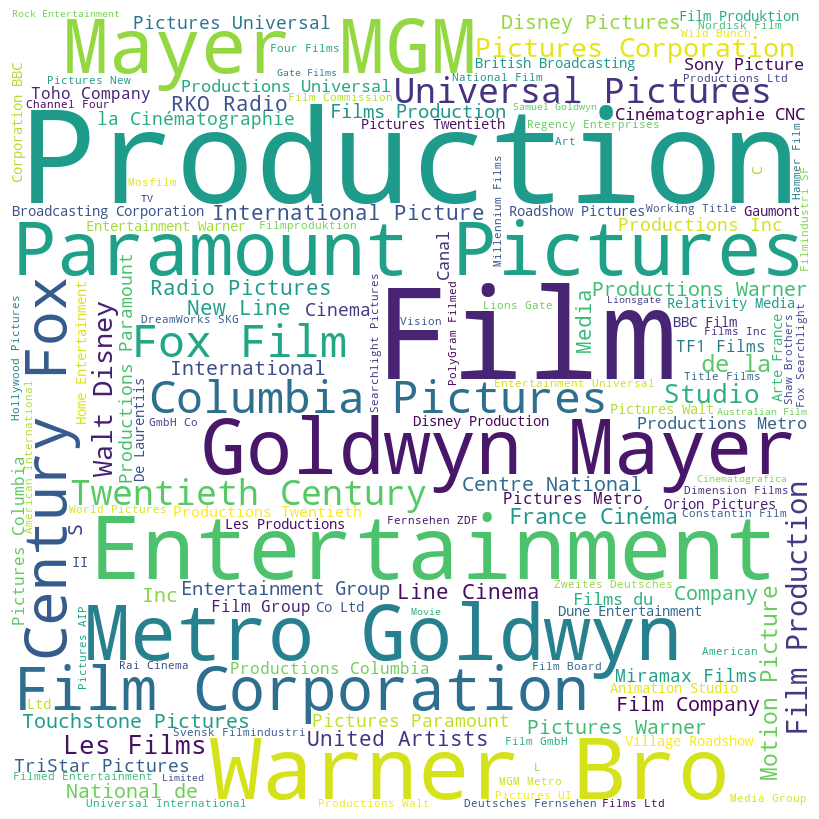

In [280]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(texto_companies)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Vemos a algunas de las companias productoras de manera muy rapida como  Warner Bro,Paramount Pictures,Centruy Fox,etc

### Release_year

Vemos si hay valores erroneos para verificar la calidad de los datos

In [283]:
for i,elemento in enumerate(data["release_date"]):
    if type(elemento) != str:
        continue
    if len(elemento) != 10:
        print(i,elemento)

In [285]:
data["release_date"].isna().sum()

84

Pasamos el formato a fecha,con errors="coerce" para que los datos nulos no generen problemas

In [284]:
data["release_date"] = pd.to_datetime(data["release_date"],format="%Y-%m-%d",errors="coerce")

In [286]:
year = data["release_date"].apply(lambda x : x.year)


In [289]:
year.dropna(inplace = True)

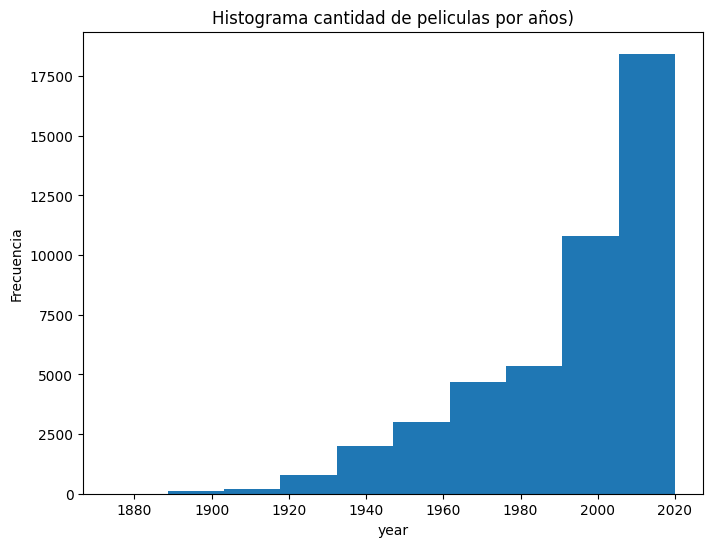

In [291]:
plt.figure(figsize=(8, 6))
plt.hist(year, bins= 10)
plt.xlabel('year')
plt.ylabel('Frecuencia')
plt.title('Histograma cantidad de peliculas por años)')

plt.show()

Podemos ver como en los ultimos años se incremento la produccion de peliculas de manera exponencial